In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import pickle

In [2]:
pd.read_excel("data/pisos_analis_data.xlsx")

,Comuna,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Precio,UF,UF_log,Poblacion total 2020,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
0,San Miguel,49,2,1,0,19/12/2022,99245550,2850,7.955425,107828,...,0,0,0,0,0,1,0,0,0,0
1,San Miguel,48,2,1,1,16/12/2022,100000000,2871,7.962764,107828,...,0,0,0,0,0,1,0,0,0,0
2,San Miguel,36,1,1,1,12/12/2022,88798650,2550,7.844241,107828,...,0,0,0,0,0,1,0,0,0,0
3,San Miguel,50,3,1,1,06/12/2022,73824760,2120,7.659643,107828,...,0,0,0,0,0,1,0,0,0,0
4,San Miguel,59,2,1,1,06/11/2022,107603070,3090,8.036250,107828,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221,Melipilla,42,2,1,1,08/12/2022,25500000,732,6.597146,84286,...,0,0,0,0,0,0,0,0,0,0
9222,Buin,160,3,2,4,14/12/2022,233314100,6700,8.810012,82267,...,0,0,0,0,0,0,0,0,0,0
9223,Buin,160,3,2,4,14/12/2022,233314100,6700,8.810012,82267,...,0,0,0,0,0,0,0,0,0,0
9224,Buin,110,3,3,1,13/12/2022,261172500,7500,8.922792,82267,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pisos=pd.read_excel("data/pisos_analis_data.xlsx")

# IMPLEMENTACION DE MODELOS DE REGRESION

## Definición de variables

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [5]:
X= pisos.drop(["Comuna",'Publi','Precio', 'UF', "UF_log",'Porcentaje de viviendas con situación de allegamiento externo','Víctimas Robo por Sorpresa', 'Número de establecimientos educacion inicial','Distancia a Educación Basica (m)'], axis=1)
y= pisos["UF_log"]

seed=12

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [7]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (9226, 78)
Train features shape: (6919, 78)
Train target shape: (6919,)
Test features shape: (2307, 78)
Test target shape: (2307,)


### 1. Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print("Score train :", metrics.r2_score(y_train, lr.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, lr.predict(X_test)))
acc1 = metrics.r2_score(y_test, lr.predict(X_test))

Score train : 0.8682373991117751
Score test: 0.8699231334757381


### 2. Decision Trees

In [10]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_depth= 5)
dt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, dt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, dt.predict(X_test)))
acc2 = metrics.r2_score(y_test, dt.predict(X_test))

Score train : 0.895955527895935
Score test: 0.8947309018307197


### 3.KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, knn.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, knn.predict(X_test)))
acc3 = metrics.r2_score(y_test, knn.predict(X_test))

Score train : 0.9096157119548226
Score test: 0.8920238554207169


### 4. XGB

In [12]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=50,random_state=seed)
xgb_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, xgb_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, xgb_reg.predict(X_test)))
acc8 = metrics.r2_score(y_test, xgb_reg.predict(X_test))

Score train : 0.944469283190554
Score test: 0.9195219239780652


### 5. AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=14, random_state=seed)
ada_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, ada_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, ada_reg.predict(X_test)))
acc5 = metrics.r2_score(y_test, ada_reg.predict(X_test))

Score train : 0.8620119617206574
Score test: 0.8589623432053313


### 6. Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=6,  max_features=3, random_state=seed) 
rnd_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, rnd_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, rnd_reg.predict(X_test)))
acc6 = metrics.r2_score(y_test, rnd_reg.predict(X_test))

Score train : 0.8574698329360423
Score test: 0.8534954437237592


### 7. GradientBoosting

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=300, random_state=seed,max_depth=3)
gbrt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, gbrt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, gbrt.predict(X_test)))
acc7 = metrics.r2_score(y_test, gbrt.predict(X_test))

Score train : 0.9342579371737746
Score test: 0.9226494954454767


In [16]:
result = [acc1, acc2, acc3, acc8, acc5, acc6, acc7]
models = ['LinReg', "DecTree","KNN", "XGBoost","AdaBoost", "RandomForest", "GradBoosting"]

In [17]:
resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

GradBoosting    0.922649
XGBoost         0.919522
DecTree         0.894731
KNN             0.892024
LinReg          0.869923
AdaBoost        0.858962
RandomForest    0.853495
dtype: float64

## VotingRegressor

In [18]:
from sklearn.ensemble import VotingRegressor

estimators = [('LinReg', lr), ("DecTree",dt), ("KNN", knn), ("XGBoost",xgb_reg), ("AdaBoost", ada_reg), ("RandomForest", rnd_reg), ("GradBoosting", gbrt)]

voting_reg = VotingRegressor(estimators=estimators, verbose=True)

voting_reg.fit(X_train, y_train)
print(voting_reg.__class__.__name__, voting_reg.score(X_test,y_test))

[Voting] ................... (1 of 7) Processing LinReg, total=   0.0s
[Voting] .................. (2 of 7) Processing DecTree, total=   0.0s
[Voting] ...................... (3 of 7) Processing KNN, total=   0.0s
[Voting] .................. (4 of 7) Processing XGBoost, total=   0.3s
[Voting] ................. (5 of 7) Processing AdaBoost, total=   0.3s
[Voting] ............. (6 of 7) Processing RandomForest, total=   0.2s
[Voting] ............. (7 of 7) Processing GradBoosting, total=   3.7s
VotingRegressor 0.9119916174165036


## StackingRegressor

In [19]:
from mlxtend.regressor import StackingRegressor

In [20]:
lr = LinearRegression()
dt= DecisionTreeRegressor(max_depth=5)
knn = KNeighborsRegressor(n_neighbors=15)
xgb_reg = XGBRegressor(n_estimators=50, random_state=seed)
ada_reg = AdaBoostRegressor(n_estimators=14, random_state=seed)
rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=6,  max_features=3, random_state=seed) 
gbrt = GradientBoostingRegressor(n_estimators=300, random_state=seed,max_depth=3)

In [21]:
stregr = StackingRegressor(regressors=[dt, gbrt, xgb_reg, ada_reg, rnd_reg, lr], 
                           meta_regressor= knn)

stregr.fit(X_train, y_train)

StackingRegressor(meta_regressor=KNeighborsRegressor(n_neighbors=15),
                  regressors=[DecisionTreeRegressor(max_depth=5),
                              GradientBoostingRegressor(n_estimators=300,
                                                        random_state=12),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=Fals...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=50, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=12, ...),
                              AdaBoostRegressor(n_estimators=14,
                                                random_state=12),
                              RandomForestRegressor(max_depth=6, max_features=3,
                                                    n_estimators=60,
                                                    random_state=12),
                              LinearRegression()])

In [22]:
stregr.score(X_test,y_test)

c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.918209423303158

___
___
___

## El 2º mejor modelo  XGB

In [23]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=50, random_state=seed)
xgb_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, xgb_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, xgb_reg.predict(X_test)))
acc5 = metrics.r2_score(y_test, xgb_reg.predict(X_test))

Score train : 0.944469283190554
Score test: 0.9195219239780652


In [24]:
predictions = xgb_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(np.expm1(y_test), np.expm1(predictions)))  
print('MSE:', metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions))))
print('MAPE:', metrics.mean_absolute_percentage_error(np.expm1(y_test), np.expm1(predictions)))

MAE: 747.1482026456083
MSE: 2177925.9802759145
RMSE: 1475.7797871891032
MAPE: 0.14348788370826415


### Feature Importance

In [25]:
xgb_reg.feature_importances_

array([5.62458187e-02, 1.68577547e-03, 3.08276601e-02, 2.93647288e-03,
       1.28812680e-03, 1.46858301e-03, 1.19612447e-03, 1.30088441e-02,
       1.30817236e-03, 3.84380937e-01, 1.56526789e-02, 8.31194397e-04,
       1.07043539e-03, 2.37871637e-03, 1.29023404e-03, 1.29731710e-03,
       2.19238689e-03, 1.38989289e-03, 3.69616598e-03, 3.18119023e-03,
       1.16922535e-01, 2.97349244e-01, 1.59228256e-03, 2.72648525e-03,
       1.32276828e-03, 5.02205570e-04, 3.35595524e-03, 1.61634421e-03,
       1.41856133e-03, 2.33430206e-03, 2.92645837e-03, 2.31804000e-03,
       1.26273762e-02, 1.06221694e-03, 1.07885106e-03, 1.38880231e-03,
       1.10685744e-03, 1.90550201e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14562929e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [26]:
df_impor_xgb=pd.DataFrame({"col":X_train.columns, "coef_impor":xgb_reg.feature_importances_})

In [27]:
df_impor_xgb = df_impor_xgb.round(decimals=2)

In [28]:
df_impor_xgb.sort_values(by= "coef_impor", ascending = False).head(10)

,col,coef_impor
9,Número de establecimientos eduacion basica,0.38
21,Fallos suministro electrico,0.30
20,Consumo Per Capita residencial (Kwh/persona),0.12
0,m2_totales,0.06
2,Banos,0.03
10,Número de establecimientos privados,0.02
37,Tiempo de viaje en trans publico hr punta,0.02
7,Distancia a Educación Inicial (m),0.01
32,Requerimiento de viviendas nuevas urbanas,0.01
75,Santiago,0.00


##  El Mejor Modelo GradientBoosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=300, random_state=seed,max_depth=3)
gbrt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, gbrt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, gbrt.predict(X_test)))


Score train : 0.9342579371737746
Score test: 0.9226494954454767


In [30]:
predictions = gbrt.predict(X_test)

print('MAE:', metrics.mean_absolute_error(np.expm1(y_test), np.expm1(predictions)))  
print('MSE:', metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions))))
print('MAPE:', metrics.mean_absolute_percentage_error(np.expm1(y_test), np.expm1(predictions)))

MAE: 738.6940267648037
MSE: 2023195.3341959245
RMSE: 1422.3907108090675
MAPE: 0.14244526208790137


### Feature importance

In [31]:
gbrt.feature_importances_

array([6.02244515e-01, 2.02749131e-03, 7.72952124e-02, 1.15191075e-02,
       1.44883098e-04, 1.02160677e-04, 2.13426174e-04, 1.60240352e-02,
       7.70115573e-04, 8.94234512e-02, 7.35634964e-03, 3.35322570e-04,
       1.26144933e-03, 6.34829415e-05, 2.71788678e-04, 4.15851621e-04,
       3.44904094e-04, 1.28309277e-04, 1.51563683e-04, 6.57967268e-04,
       3.06547410e-02, 4.52594714e-02, 5.16026386e-04, 5.59818762e-04,
       3.77449513e-05, 4.70753052e-04, 1.18751998e-03, 1.69143404e-04,
       9.80226410e-04, 5.77237976e-03, 2.04107094e-03, 4.33070625e-02,
       2.70252801e-04, 5.08139343e-02, 4.76492499e-04, 1.65977192e-04,
       2.67982910e-04, 5.38200467e-03, 0.00000000e+00, 1.74310188e-06,
       0.00000000e+00, 1.12264426e-04, 0.00000000e+00, 3.41187074e-05,
       9.25406630e-06, 1.56226852e-05, 0.00000000e+00, 0.00000000e+00,
       4.99498065e-05, 4.12334045e-05, 0.00000000e+00, 4.21546335e-06,
       0.00000000e+00, 4.57007074e-06, 0.00000000e+00, 1.50888553e-06,
      

In [32]:
df_import_gbrt= pd.DataFrame({"col":X_train.columns, "coef_impor": gbrt.feature_importances_})

In [33]:
df_import_gbrt= df_import_gbrt.round(decimals=2)

In [34]:
df_import_gbrt.sort_values(by= "coef_impor",ascending= False).head(10)

,col,coef_impor
0,m2_totales,0.60
9,Número de establecimientos eduacion basica,0.09
2,Banos,0.08
21,Fallos suministro electrico,0.05
33,Ingreso promedio del hogar por Comuna,0.05
31,Porcentaje de Hacinamiento,0.04
20,Consumo Per Capita residencial (Kwh/persona),0.03
7,Distancia a Educación Inicial (m),0.02
10,Número de establecimientos privados,0.01
29,Porcentaje de unidades vecinales que tienen e...,0.01


____
____
____


## PCA & Pipeline al Segundo mejor modelo  XGB

In [35]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
model_pca = PCA(n_components=78)
model_pca.fit(X_train)
X_pca = model_pca.fit_transform(X_train)

In [37]:
X_pca.shape

(6919, 78)

In [38]:
ratiot = model_pca.explained_variance_ratio_
ratiot.round(3)

array([0.599, 0.32 , 0.07 , 0.011, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [39]:
ratiot[:4]

array([0.59891661, 0.32038669, 0.06999059, 0.01063626])

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

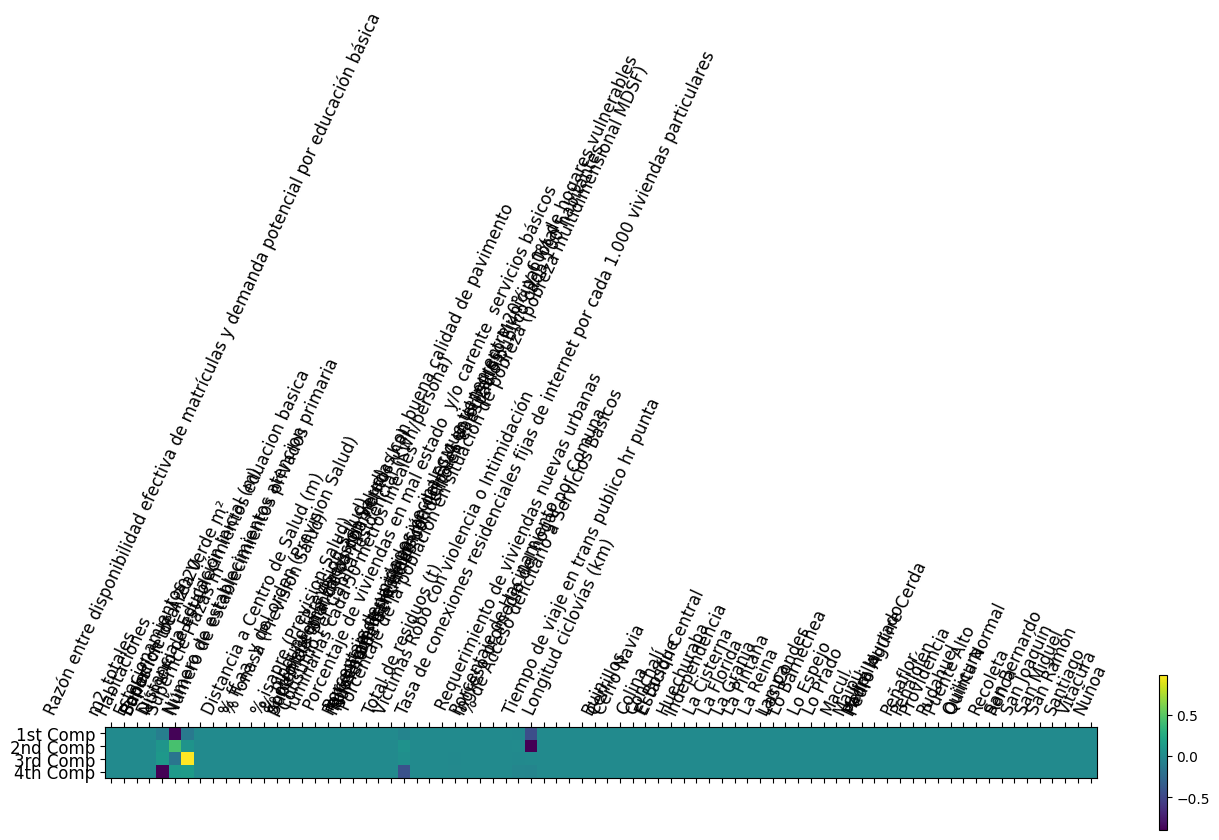

In [41]:
#plt.figure(figsize=(20,20))
plt.matshow(model_pca.components_[0:4], cmap='viridis')
plt.yticks([0,1,2,3,],['1st Comp','2nd Comp','3rd Comp','4th Comp',], fontsize=12)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, fontsize=12, rotation = 65)
plt.show();

In [42]:
# podemos ver que tanto el escalado como el pipeline emperora el resultado

In [43]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=4)), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.9228290896079981
GBR_test: 0.8902633538015169


# Vamos aplicar un Pipeline y GridSearchCV al segundo mejor modelo XGB

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
    
])


xgboost_params = {
    'regressor': [XGBRegressor()],
    'regressor__max_depth': [3,4,5,6],
    'regressor__n_estimators': [40,50,60,80,100, 120]

}


search_space = [
  
    xgboost_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma...
                                                     learning_rate=None,
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=4,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=80,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...)],
                          'regressor__max_depth': [3, 4, 5, 6],
                          'regressor__n_estimators': [40, 50, 60, 80, 100,
                                                      120]}])

In [46]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=4, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=80,
                              n_jobs=0, num_parallel_tree=1, 

 ## GridSearchCV sin pipeline XGB

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


XGB =XGBRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [40,50,60,80,100],
                  'max_depth'    : [3,4,5,6,8]# profundidad
                 }

In [49]:
grid_XGB = GridSearchCV(estimator= XGB,  # estuviemos copando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_XGB.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.8766576233349891

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


XGB =XGBRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [120,220,320],
                  'max_depth'    : [3,4,5,6,8]# profundidad
                 }

In [ ]:
grid_XGB = GridSearchCV(estimator= XGB,  # estuviemos copando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [120, 220, 320],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.9189784092313578

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 220, 'subsample': 0.9}


___
___
___

## PCA & Pipeline al mejor modelo  Bosting_regressor

In [51]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=4)), ('regressor', GradientBoostingRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.8749705101897374
GBR_test: 0.8645893430580196


# Vamos aplicar un Pipeline y GridSearchCV Bosting_regressor

In [59]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
])


bosting_ressor_params = {
    'regressor': [GradientBoostingRegressor()],
    'regressor__max_depth': [3,4,5,6,7,8],
    'regressor__n_estimators': [220,240,260,280]
}


search_space = [
  
    bosting_ressor_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 3)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [GradientBoostingRegressor(max_depth=4,
                                                                  n_estimators=240)],
                          'regressor__max_depth': [3, 4, 5, 6, 7, 8],
                          'regressor__n_estimators': [220, 240, 260, 280]}])

In [60]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=4, n_estimators=240))])
0.9178718818281419
{'regressor': GradientBoostingRegressor(max_depth=4, n_estimators=240), 'regressor__max_depth': 4, 'regressor__n_estimators': 240}


In [61]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.9189784092313578

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 220, 'subsample': 0.9}


In [62]:
## vamos a modificar los parametros entre 300 y 380, recordar que el mejor resultado es con 300 a pelo

In [63]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
])


bosting_ressor_params = {
    'regressor': [GradientBoostingRegressor()],
    'regressor__max_depth': [3,4,5,6,7,8],
    'regressor__n_estimators': [300,320,360,380]
}


search_space = [
  
    bosting_ressor_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 3)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [GradientBoostingRegressor(max_depth=4,
                                                                  n_estimators=300)],
                          'regressor__max_depth': [3, 4, 5, 6, 7, 8],
                          'regressor__n_estimators': [300, 320, 360, 380]}])

In [64]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=4, n_estimators=300))])
0.9171366119360548
{'regressor': GradientBoostingRegressor(max_depth=4, n_estimators=300), 'regressor__max_depth': 4, 'regressor__n_estimators': 300}


 # GridSearchCV sin pipeline

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [300,350,400],
                  'max_depth'    : [3,4,5,6,8,]# profundidad
                 }

In [67]:
grid_GBR = GridSearchCV(estimator=GBR,  
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [300, 350, 400],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [68]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=5, n_estimators=350,
                          subsample=0.5)

 The best score across ALL searched params:
 0.9196431157610091

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 350, 'subsample': 0.5}


In [69]:
## vamos a modificar los parametros entre 300 y 400

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [320,340,360,380],
                  'max_depth'    : [3,4,5,6,8,]# profundidad
                 }

In [71]:
grid_GBR = GridSearchCV(estimator=GBR,  # estuvimos copiando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [320, 340, 360, 380],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [72]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=5, n_estimators=340,
                          subsample=0.5)

 The best score across ALL searched params:
 0.9195608608101362

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 340, 'subsample': 0.5}
